In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

In [8]:
data = pd.read_excel('新闻分析样本 2019-07-09.xlsx')
print(data.shape)
print(data.columns)

(5981, 10)
Index(['news_code', 'news_title', 'news_roundup', 'news_detail', 'news_author',
       'pub_time', 'news_source', 'news_tags', 'src_url', 'spider_date'],
      dtype='object')


In [3]:
data.to_csv('新闻分析样本 2019-07-09.csv', encoding='utf-8', sep=",")

In [18]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')
print(data.shape)
print(data['spider_date'].head())
print(data.columns)

(5981, 11)
0    2019-07-09 23:59:58
1    2019-07-09 23:59:56
2    2019-07-09 23:59:54
3    2019-07-09 23:58:30
4    2019-07-09 23:58:25
Name: spider_date, dtype: object
Index(['Unnamed: 0', 'news_code', 'news_title', 'news_roundup', 'news_detail',
       'news_author', 'pub_time', 'news_source', 'news_tags', 'src_url',
       'spider_date'],
      dtype='object')


## 一.数据库整体分析

### 1是整体新闻数量的走势，在24小时/1周内的走势，可以折线图的方式来展示

In [ ]:
思路：虽然没有数据库，但是以表格数据最后一列，即爬取时间为横轴(显示12点到23点的数据)，以某一段爬取时间内新闻的数量为纵轴进行分析

In [91]:
data['spider_date'] = pd.to_datetime(data['spider_date'], format='%Y-%m-%d %H:%M:%S')
#data_groupbyhour = df.groupby(data, by=[data.index.hour])['spider_date'].count()

In [30]:
data.index=data['spider_date']

In [40]:
data_groupbyhour = df.groupby(data, by=[data.index.hour])['spider_date'].count()

In [92]:
print(data_groupbyhour)
print(type(data_groupbyhour))
#print(data_groupbyhour.index)
#print(data_groupbyhour.name)

12    136
13    484
14    465
15    573
16    633
17    815
18    645
19    572
20    575
21    441
22    471
23    170
Name: spider_date, dtype: int64
<class 'pandas.core.series.Series'>


In [78]:
#将提取出数据构建成dataframe
data_groupbyhour.index = [int(i) for i in data_groupbyhour.index]
data_news_time = np.array([np.array(data_groupbyhour.index), np.array(data_groupbyhour)]).T
#print(data_news_time)
spider_date_df = pd.DataFrame(data=data_news_time,
                             columns=['news_time', 'news_num'])
print(spider_date_df)


    news_time  news_num
0          12       136
1          13       484
2          14       465
3          15       573
4          16       633
5          17       815
6          18       645
7          19       572
8          20       575
9          21       441
10         22       471
11         23       170


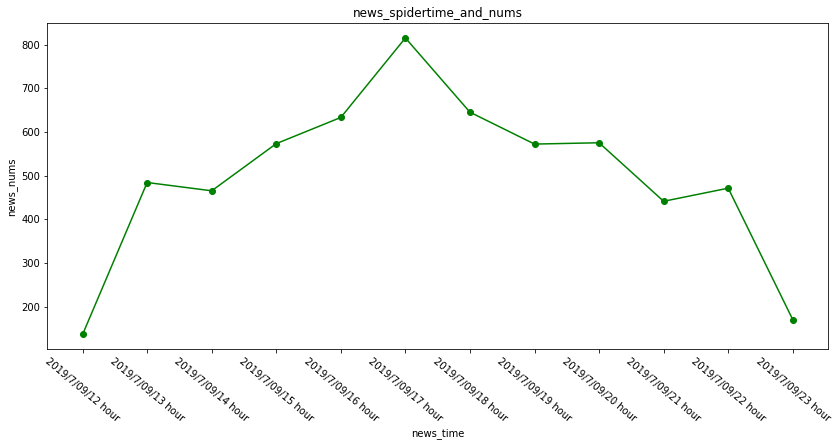

In [127]:

fig1, ax = plt.subplots(figsize=(14, 6))

x=list(spider_date_df['news_time'])
#print(x)
y=list(spider_date_df['news_num'])
xlabels=[u'2019/7/09/%s hour' % i for i in x]
#print(xlabels)
ax.plot(xlabels, y ,'g-o')
#plt.minorticks_on()

#xticks=list(range(0,len(totalSeed),40))

ax.set_xticklabels(xlabels, rotation=-40)
plt.title('news_spidertime_and_nums')
plt.xlabel('news_time')
plt.ylabel('news_nums')
plt.show()
#  从图上可以看出17点爬取的数据最多

### 2是分析新闻来源于各个网站所占的比例，可用饼状图的方式展示

In [14]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')
news_code_list = [str(i)[:4] for i in data['news_code'].tolist()]
data['news_code'] = pd.Series(news_code_list)
news_code_series = df.groupby(data, data['news_code'])['news_code'].count()
news_code_array = np.array([news_code_series.index, news_code_series]).T
news_code_df = pd.DataFrame(news_code_array, columns=['news_code_id', 'count'])
#print(news_code_df)
#print(news_code)
#print(type(a), a[:5])
#data['src_url'] = 
#data.index = data['src_url']

  news_code_id count
0         1004  1451
1         1005  4010
2         1006   108
3         1007   412


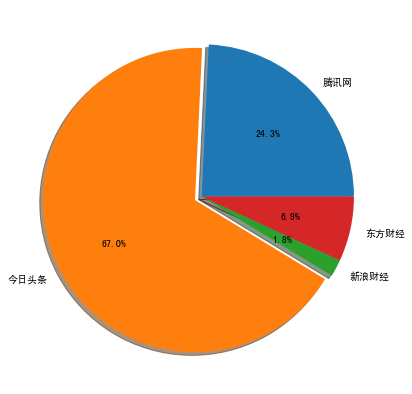

In [25]:
plt.figure(figsize=(7, 7))
news_code_id = news_code_df['news_code_id'].tolist()
news_code_labels = ['腾讯网', '今日头条', '新浪财经', '东方财经']
count = news_code_df['count'].tolist()
explode = (0, 0.05, 0, 0)
patches,l_text,p_text = plt.pie(count, labels=news_code_labels, autopct='%.1f%%', explode=explode,
                               shadow=True)

plt.show()

### 3是分析新闻来源于所占的比例

In [2]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')
data.index = data['news_source']
news_source = df.groupby(data, data['news_source'])['news_source'].count()

In [3]:
news_source = df.groupby(data, data['news_source'])['news_source'].count()
#print(news_source)

In [4]:
news_source_index_count = np.array([news_source.index, news_source]).T
news_source_df = pd.DataFrame(news_source_index_count, columns=['news_source', 'count'])
news_source_df_10 = news_source_df.sort_values('count', ascending=False)[:10]
print(news_source_df_10)

        news_source count
130           同花顺财经  1206
55            中国经济网   375
227             格隆汇   373
19              e公司   371
319            证券时报   326
266            界面新闻   261
350             金融界   223
317            证券日报   200
231          每日经济新闻   179
297  腾讯新闻版权合作-证券时报网   175


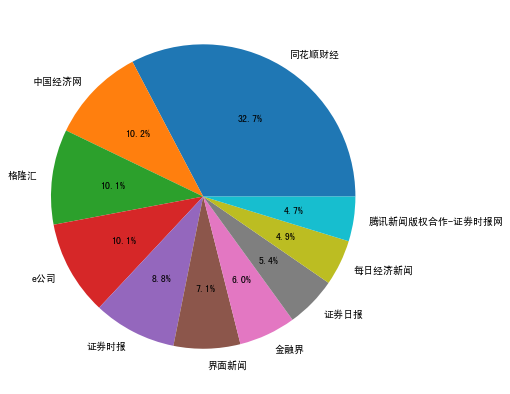

In [9]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
#mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False 
count = list(news_source_df_10['count'])
labels = list(news_source_df_10['news_source'])
plt.figure(figsize=[7, 7])
plt.pie(count, labels=labels, autopct = '%3.1f%%')
plt.show()

## 二.网站更新规律分析，以今人头条为例

### 1.每个频道爬取数量分析

In [13]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')
news_code_list = [str(i) for i in data['news_code'] if str(i)[:4]=='1005']
channel_code = [i[4:7] for i in news_code_list]
#print(channel_code[:10])
#print(news_code_list[:10])
# data['news_code'] = pd.Series(news_code_list)

news_code_array = np.array([news_code_list, channel_code]).T
news_code_df = pd.DataFrame(news_code_array, columns=['news_code_id', 'channel_code'])
print(news_code_df.head())
#news_code_df.index = news_code_df['channel_code']
news_code_series = df.groupby(news_code_df, news_code_df['channel_code'])['channel_code'].count()
#print(news_code_series.head())
channel_code_array = np.array([news_code_series.index, news_code_series]).T
channel_code_df = pd.DataFrame(channel_code_array, columns=['channel_code', 'count'])
print(channel_code_df)



       news_code_id channel_code
0  1005121907090010          121
1  1005121907090010          121
2  1005111907090000          111
3  1005991907091040          991
4  1005991907090960          991
  channel_code count
0          111   455
1          121    81
2          131    96
3          141    29
4          991  3349


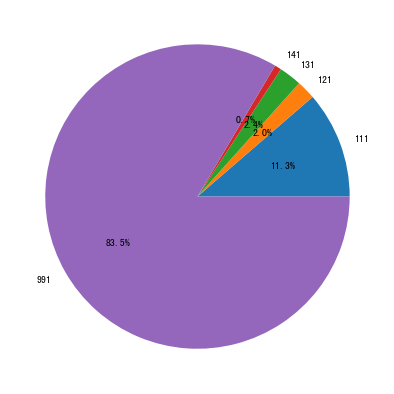

In [14]:
plt.figure(figsize=(7, 7))
count = channel_code_df['count'].tolist()
labels = channel_code_df['channel_code'].tolist()
plt.pie(count, labels=labels, autopct='%.1f%%')
plt.show()

### 2. 分析特定时间段内新闻数量的走势

In [24]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')
# news_code_1005 = [i for i in data['news_code'] if str(i)[:4] == '1005']
# print(news_code_1005[:5])

In [28]:
# news_code_1005_array = np.array(news_code_1005).T
# news_code_1005_df = pd.DataFrame(news_code_1005_array, columns=['news_code_1005'])
# #print(news_code_1005_df.head(10))
# news_code_1005_df.index = news_code_1005_df['news_code_1005']
print(data.shape)
select_index = []
for index, row in data.iterrows():
    if str(row['news_code'])[:4] == '1005':
        select_index.append(index)
#print(select_index[:50])
print(len(select_index))

    
# data.index = data['news_code']
# print(data.shape)
# print(news_code_1005_df.shape)
# print(data.head(3))
# print(news_code_1005_df.head(3))
#news_code_1005 = pd.concat([data, news_code_1005_df], axis=1, join = 'inner')
#print(news_code_1005.shape, news_code_1005['spider_date'].head(10))

(5981, 11)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 56, 57, 58, 59]
4010


In [59]:
#print(select_index)
#print(type(data))
select_news_spider_date = data.iloc[select_index, [1, 10]]
#print(type(select_news_spider_date['spider_date']))
select_news_spider_date['spider_date'] = pd.to_datetime(select_news_spider_date['spider_date'], format='%Y-%m-%d %H:%M:%S')
#print(type(select_news_spider_date['spider_date']))
select_news_spider_date.index = select_news_spider_date['spider_date']
data_groupbyhour = df.groupby(select_news_spider_date, by=[select_news_spider_date.index.hour])['spider_date'].count()
print(data_groupbyhour)

spider_date
12.0     79
13.0    282
14.0    322
15.0    408
16.0    482
17.0    543
18.0    397
19.0    386
20.0    361
21.0    274
22.0    323
23.0    152
Name: spider_date, dtype: int64


In [52]:
#from pandas.tseries.resample import TimeGrouper
import numpy
#30minute_return = select_news_spider_date.groupby(pd.TimeGrouper('30M', closed = 'left')).aggregate(numpy.sum)

In [64]:
print(select_news_spider_date.head())

                            news_code         spider_date
spider_date                                              
2019-07-09 23:59:58  1005121907090010 2019-07-09 23:59:58
2019-07-09 23:59:56  1005121907090010 2019-07-09 23:59:56
2019-07-09 23:59:54  1005111907090000 2019-07-09 23:59:54
2019-07-09 23:58:30  1005991907091040 2019-07-09 23:58:30
2019-07-09 23:58:25  1005991907090960 2019-07-09 23:58:25


In [66]:
a = select_news_spider_date.groupby(pd.Grouper(freq='30m')).aggregate(np.sum)
print(a)

                       news_code
spider_date                     
2019-07-31   4032443475524999680


In [75]:
#times = select_news_spider_date['spider_date']
a = select_news_spider_date.groupby([select_news_spider_date.index.hour, select_news_spider_date.index.minute])['spider_date'].count()
#print(a)
pd.TimeGrouper


pandas.core.api.TimeGrouper

In [153]:
import time
import datetime 
minu_return = select_news_spider_date.groupby(pd.TimeGrouper(freq='30Min'))['spider_date'].count()
#print(minu_return)
minu_return.sort_index
print(minu_return.head())
count = list(minu_return.values)
time_peri = minu_return.index
#print(time_peri)
time_peri_list = []
#time_peri_int = []
for i in time_peri:
    #f = datetime.datetime.fromtimestamp(i.timestamp())
    f = datetime.datetime.fromtimestamp(i.timestamp()) + datetime.timedelta(hours=-8)
    #a = datetime.timedelta(hours=8)
    f = f.strftime("%Y-%m-%d %H:%M:%S")
    #print(type(f), f)
    time_peri_list.append(f[-9:])
    #time_peri_int.append(int(f[-9:]))
    
#print(c)
#c = [i[:8] for i in c]
print(count, type(count))
print(time_peri_list, type(time_peri_list))
x = [i for i in range(len(count))]
print(x)

spider_date
2019-07-09 12:30:00     79
2019-07-09 13:00:00    121
2019-07-09 13:30:00    161
2019-07-09 14:00:00    176
2019-07-09 14:30:00    146
Name: spider_date, dtype: int64
[79, 121, 161, 176, 146, 199, 209, 252, 230, 294, 249, 210, 187, 156, 230, 198, 163, 137, 137, 187, 136, 98, 54] <class 'list'>
[' 12:30:00', ' 13:00:00', ' 13:30:00', ' 14:00:00', ' 14:30:00', ' 15:00:00', ' 15:30:00', ' 16:00:00', ' 16:30:00', ' 17:00:00', ' 17:30:00', ' 18:00:00', ' 18:30:00', ' 19:00:00', ' 19:30:00', ' 20:00:00', ' 20:30:00', ' 21:00:00', ' 21:30:00', ' 22:00:00', ' 22:30:00', ' 23:00:00', ' 23:30:00'] <class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


/Users/jw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
def draw_line(x, y, xlabels,title, xlabel, ylabel):
    fig1, ax = plt.subplots(figsize=(10, 6))

    # x=list(spider_date_df['news_time'])
    # #print(x)
    # y=list(spider_date_df['news_num'])
    # xlabels=[u'2019/7/09/%s hour' % i for i in x]
    # #print(xlabels)
    ax.plot(x, y ,'g-o')
    #plt.minorticks_on()

    #xticks=list(range(0,len(totalSeed),40))
    print(len(x), len(xlabels), len(y))
    #ax.set_xticklabels(xlabels, rotation=-90)
    ax.set_xticklabels(xlabels)
    
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


23 23 23


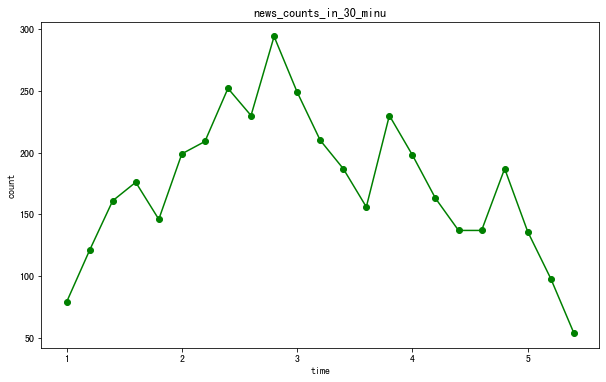

In [165]:
draw_line(x ,count, x, 'news_counts_in_30_minu', 'time', 'count')

In [35]:
Index(['Unnamed: 0', 'news_code', 'news_title', 'news_roundup', 'news_detail',
       'news_author', 'pub_time', 'news_source', 'news_tags', 'src_url',
       'spider_date']

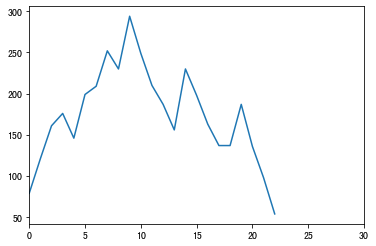

In [178]:
plt.plot(x,count)
plt.xticks=x[::1]
plt.xlabels = x
plt.xlim([0,30])
plt.show()
#plt.xticks([i for i in range(20)])


## 三.爬取时间延迟分析

In [2]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')

In [213]:
import re
a = re.findall(r'\d+-\d+-\d+ \d+:\d+:\d+', '2019-07-09 20:00:00')
print(a)

['2019-07-09 20:00:00']


In [3]:
#['2019-07-09 20:00:00' for i in data['pub_time'] if i !='%Y-%m-%d %H:%M:%S' else i]
data['pub_time'] = pd.Series(['2019-07-09 20:00:00' if i[:4] !='2019' else i for i in data['pub_time']])


In [220]:
#time.mktime(time.strptime('2019-07-09 20:00:00','%Y-%m-%d %H:%M:%S'))

1562673600.0

In [11]:
data['pub_time'] = pd.to_datetime(data['pub_time'], format='%Y-%m-%d %H:%M:%S')
print(data['pub_time'].head())
print(data['pub_time'].shape)

0   2019-07-09 23:39:05
1   2019-07-09 11:58:08
2   2019-07-09 23:33:22
3   2019-07-09 23:53:53
4   2019-07-09 23:55:13
Name: pub_time, dtype: datetime64[ns]
(5981,)


In [5]:
data['spider_date'] = pd.to_datetime(data['spider_date'], format='%Y-%m-%d %H:%M:%S')
print(data['spider_date'].head())

0   2019-07-09 23:59:58
1   2019-07-09 23:59:56
2   2019-07-09 23:59:54
3   2019-07-09 23:58:30
4   2019-07-09 23:58:25
Name: spider_date, dtype: datetime64[ns]


In [227]:
# for i in data['pub_time']:
#     print(i, type(i))

In [10]:
# f = datetime.datetime.fromtimestamp(i.timestamp()) + datetime.timedelta(hours=-8)
#     #a = datetime.timedelta(hours=8)
#     f = f.strftime("%Y-%m-%d %H:%M:%S")
# pub_spider_time = zip(data['spider_date'], data['pub_time'])
# print(pub_spider_time)
# for i in pub_spider_time:
#     print(i)
#print(data['pub_time'][2])

interval_list = []   
for i, date in enumerate(data['spider_date']):
    pub = data['pub_time'][i]
    #interval = datetime.datetime.fromtimestamp(date.timestamp()) - datetime.datetime.fromtimestamp(pub.timestamp())
    #print(interval, type(interval))
    interval = date - pub
    interval_list.append(interval)

print(len(interval_list), interval_list[:5])


5981 [Timedelta('0 days 00:20:53'), Timedelta('0 days 12:01:48'), Timedelta('0 days 00:26:32'), Timedelta('0 days 00:04:37'), Timedelta('0 days 00:03:12')]


In [19]:
interval_series = pd.Series(interval_list).T
interval_series.name = 'interval'
print(interval_series.shape)

(5981,)


In [17]:
data['spider_date'].shape

(5981,)

In [45]:
spider_interval_df = pd.concat([data['spider_date'], interval_series], axis=1)
spider_interval_df.sort_values('spider_date', inplace=True)
print(spider_interval_df.head(10))


             spider_date interval
5980 2019-07-09 12:30:42 01:32:42
5979 2019-07-09 12:30:47 03:03:47
5977 2019-07-09 12:30:48 03:11:48
5978 2019-07-09 12:30:48 03:04:48
5976 2019-07-09 12:32:06 00:00:41
5975 2019-07-09 12:32:08 00:04:13
5973 2019-07-09 12:32:10 00:19:10
5974 2019-07-09 12:32:10 00:14:10
5972 2019-07-09 12:32:45 00:06:58
5969 2019-07-09 12:33:03 00:10:30


In [32]:
#pd.groupby(spider_interval_df, by=spider_interval_df['spider_date'])


/Users/jw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [66]:
spider_date_1mincount = pd.pivot_table(spider_interval_df, values=['spider_date'], 
                                       index=pd.Grouper(freq='1min', key='spider_date'),
                                       aggfunc='count')
print(spider_date_1mincount.head(), spider_date_1mincount.shape)

                     interval
spider_date                  
2019-07-09 12:30:00         4
2019-07-09 12:31:00         0
2019-07-09 12:32:00         5
2019-07-09 12:33:00        17
2019-07-09 12:34:00         7 (690, 1)


In [65]:
# spider_date_1mincount_index = [i[11:] for i in spider_date_1mincount.index.tolist()]
# print(spider_date_1mincount_index[:5])

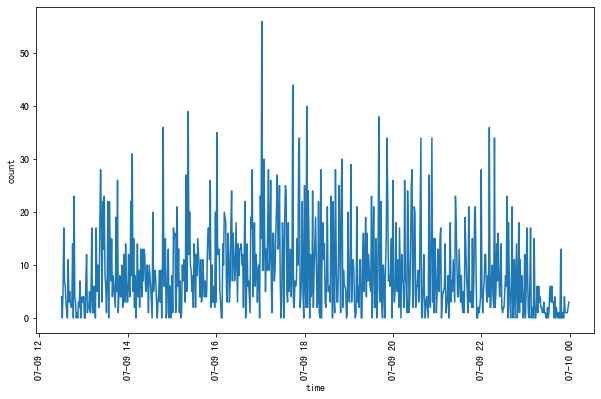

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
x_stick = 
y_stick = spider_date_1mincount
ax.plot(x_stick, y_stick)

for label in ax.get_xticklabels()[::50]:
        label.set_visible(True)

plt.xticks(rotation=90)
plt.xlabel('time')
plt.ylabel('count')
plt.show()
#print(help(ax))

             spider_date interval
5980 2019-07-09 12:30:42 01:32:42
5979 2019-07-09 12:30:47 03:03:47
5977 2019-07-09 12:30:48 03:11:48
5976 2019-07-09 12:32:06 00:00:41
5975 2019-07-09 12:32:08 00:04:13


TypeError: 'list' object is not callable

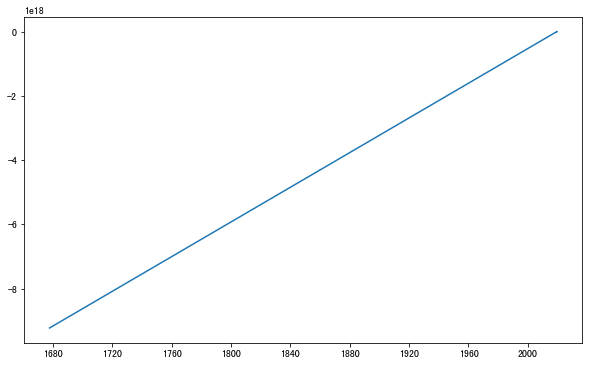

In [76]:
spider_interval_df_drop = spider_interval_df.drop_duplicates('spider_date')
print(spider_interval_df_drop.head())
fig, ax = plt.subplots(figsize=(10,6))

x = spider_interval_df_drop['spider_date']
y = spider_interval_df_drop['interval']

ax.plot(x,y)

plt.show()

In [33]:
#print(help(pd.pivot_table))

In [16]:
interval_series.resample('2H').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

## 四.单个爬取网站内新闻源分析


In [230]:
data = pd.read_csv('新闻分析样本 2019-07-09.csv')

In [238]:
select_rows = []
for _, row in data.iterrows():
    if str(row['news_code'])[:4] == '1005':
        select_rows.append(row.T)

In [239]:
print(len(select_rows))

4010


In [249]:
a = pd.concat(select_rows, axis=1)
select_data = a.T
print(select_data.columns)
print(select_data.shape)

Index(['Unnamed: 0', 'news_code', 'news_title', 'news_roundup', 'news_detail',
       'news_author', 'pub_time', 'news_source', 'news_tags', 'src_url',
       'spider_date'],
      dtype='object')
(4010, 11)


In [263]:
news_source_series = select_data.groupby(by=select_data['news_source'])['news_source'].count()
news_source_series = news_source_series.sort_values(ascending=False)
print(news_source_series[:20])
news_source_20 = news_source_series[:20]
labels = news_source_20.index.tolist()
print(labels)
count = news_source_20.tolist()
print(count)
for i in labels:
    print(type(i))
    

news_source
同花顺财经       1206
中国经济网        369
证券时报         278
金融界          222
e公司          191
智通财经         164
中国证券报        161
界面新闻         131
每日经济新闻       101
投资快报          86
第一财经          85
证券之星          83
数据宝           77
FX168财经网      53
证券日报          47
中新经纬          42
格隆汇           39
经济观察报         37
挖贝网           33
AI财经社         29
Name: news_source, dtype: int64
['同花顺财经', '中国经济网', '证券时报', '金融界', 'e公司', '智通财经', '中国证券报', '界面新闻', '每日经济新闻', '投资快报', '第一财经', '证券之星', '数据宝', 'FX168财经网', '证券日报', '中新经纬', '格隆汇', '经济观察报', '挖贝网', 'AI财经社']
[1206, 369, 278, 222, 191, 164, 161, 131, 101, 86, 85, 83, 77, 53, 47, 42, 39, 37, 33, 29]
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [270]:
#labels=labels, 一定要写这一行
def draw_pie(data, labels):
    plt.figure(figsize=(7, 7))
    plt.pie(data, labels=labels, autopct='%.2f%%')  
    plt.show()

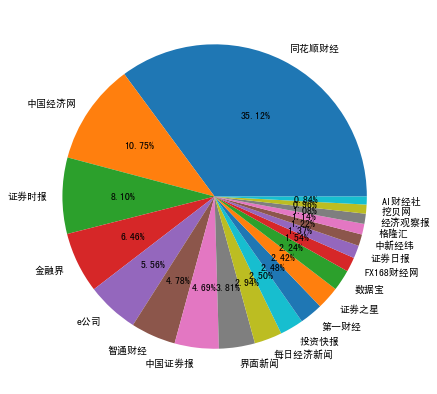

In [271]:
draw_pie(count, labels)